In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, fancy_legend, mpl_loc, load_mpl_presets
import numpy as np
import math as m
import vice
import sys
load_mpl_presets()
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


# Determining the ratio of the heights of the two infall episodes based on the ratio of present-day thin-disk to thick-disk stars

In short, assert that the ratio of the integrals over the two infall histories should give $\Sigma_T / \Sigma_t$ consistent with the Milky Way disk (e.g. 0.27 as reported by [Bland-Hawthorn & Gerhard 2016](https://ui.adsabs.harvard.edu/abs/2016ARA%26A..54..529B/abstract)). The two-infall model can be characterized according to the following expression:

$$\dot{M}_\text{in} = A e^{-t / \tau_1} + H(t - t_2)B e^{-(t - t_2) / \tau_2}$$

where $A$ and $B$ are the initial heights of the two infall episodes, $\tau_1$ and $\tau_2$ are their e-folding
timescales, $t_2$ is the time of onset of the second infall episode, and $H$ is the Heaviside step function:

$$
H(x) \equiv \begin{cases}
1 & (x \geq 0)
\\
0 & (x < 0)
\end{cases}
$$

This assertion boils down to the following:

$$
\begin{align}
\frac{\Sigma_T}{\Sigma_t} &= \frac{\int_0^T Ae^{-t/\tau_1} dt}{\int_{t_2}^T Be^{-(t - t_2)/\tau_2} dt}
\\
&= \frac{-A\tau_1e^{-t / \tau_1}\Big|_0^T}{-B\tau_2e^{-(t - t_2)/\tau_2}\Big|_{t_2}^T}
\\
&= \frac{A\tau_1(1 - e^{-T/\tau_1})}{B\tau_2(1 - e^{-(T - t_2)/\tau_2})}
\end{align}
$$

And therefore:

$$
\frac{B}{A} = \left(\frac{\Sigma_t}{\Sigma_T}\right)
\frac{\tau_1(1 - e^{-T/\tau_1})}{\tau_2(1 - e^{-(T - t_2)/\tau_2})}
$$

The ratio of thin-disk to thick-disk stars at a given radius can be derived from their scale radii and ratio at $R = 0$ as reported by [Bland-Hawthorn & Gerhard (2016)](https://ui.adsabs.harvard.edu/abs/2016ARA%26A..54..529B/abstract). They report $R_T = 2.0$ kpc, $R_t = 2.5$ kpc, and $\Sigma_T(R = 0) / \Sigma_t(R = 0) = 0.27$.

$$
\begin{align}
\frac{\Sigma_t}{\Sigma_T} &= \frac{\Sigma_t(R = 0) e^{-R/R_t}}{\Sigma_T(R = 0) e^{-R/R_T}}
\\
&= \frac{1}{0.27}\exp\left\{\frac{R}{R_T} - \frac{R}{R_t}\right\}
\\
&= \frac{1}{0.27}\exp\left\{R\left(\frac{1}{R_T} - \frac{1}{R_t}\right)\right\}
\end{align}
$$

And the final expression for the ratio of normalizations of the two infall episodes $B / A$:

$$
\frac{B}{A} = \frac{1}{0.27}\exp\left\{R\left(\frac{1}{R_T} - \frac{1}{R_t}\right)\right\}
\frac{\tau_1(1 - e^{-T/\tau_1})}{\tau_2(1 - e^{-(T - t_2)/\tau_2})}
$$

This ratio as a function of galactocentric radius for the current choice of parameters:

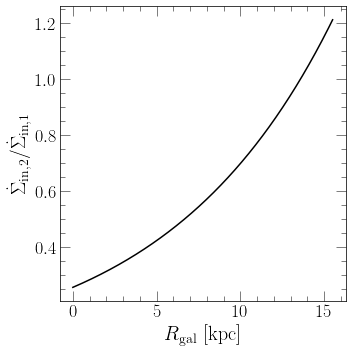

In [2]:
sys.path.append("..")
from src.simulations.models.twoinfall import twoinfall
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$R_\text{gal}$ [kpc]")
ax.set_ylabel(r"$\dot{\Sigma}_{\text{in},2} / \dot{\Sigma}_{\text{in},1}$")
xvals = np.linspace(0, 15.5, 1000)
twoinfall_ = twoinfall(0.)
yvals = len(xvals) * [0.]
for i in range(len(xvals)):
    twoinfall_.radius = xvals[i]
    yvals[i] = twoinfall_.amp_ratio(xvals[i])
ax.plot(xvals, yvals, c = named_colors()["black"])
plt.tight_layout()
plt.show()